In [1]:
from pathlib import Path
import json
import pandas as pd
from Bio import SeqIO
import hashlib
import pickle

In [2]:
 with Path('../../DATA/boltz_2/pdb_seqres.txt').open("r") as f:
    data = list(SeqIO.parse(f, "fasta"))

In [3]:
def hash_sequence(seq: str) -> str:
    """Hash a sequence."""
    return hashlib.sha256(seq.encode()).hexdigest()

In [4]:
with Path("clustering/clustering.json").open("r") as f:
    clusters: dict[str, str] = json.load(f)
    clusters = {k.lower(): v.lower() for k, v in clusters.items()}

In [5]:
proteins = set()
shorts = set()
nucleotides = set()

# Separate the sequences into proteins, nucleotides and short sequences
# Short sequences cause a bug in the clustering, so they are separated
for seq in data:
    if set(str(seq.seq)).issubset({"A", "C", "G", "T", "U", "N"}):
        nucleotides.add(str(seq.seq).strip())
    elif len(str(seq.seq).strip()) < 10:  # noqa: PLR2004
        shorts.add(str(seq.seq).strip())
    else:
        proteins.add(str(seq.seq).strip())

In [6]:
proteins = [f">{hash_sequence(seq)}\n{seq}" for seq in proteins]
# with (outdir / "proteins.fasta").open("w") as f:
#     f.write("\n".join(proteins))

In [7]:
clustering_path = "clustering/clust_prot_cluster.tsv"
protein_data = pd.read_csv(clustering_path, sep="\t", header=None)
clusters = protein_data[0]
items = protein_data[1]
clustering = dict(zip(list(items), list(clusters)))

# Each shqrt sequence is given an id
for short in shorts:
    short_id = hash_sequence(short)
    clustering[short_id] = short_id

# Each unique rna sequence is given an id
for nucl in nucleotides:
    nucl_id = hash_sequence(nucl)
    clustering[nucl_id] = nucl_id

# Load ligand data
with Path('/scratch/shjiang/DATA/boltz_1/ccd/ccd.pkl').open("rb") as handle:
    ligand_data = pickle.load(handle)  # noqa: S301

# Each unique ligand CCD is given an id
for ccd_code in ligand_data:
    clustering[ccd_code] = ccd_code

# # Save clustering
# with (outdir / "clustering.json").open("w") as handle:
#     json.dump(clustering, handle)

In [8]:
with open('/scratch/shjiang/DATA/boltz_1/rcsb_processed_targets/manifest.json', 'r') as f:
    manifest = json.load(f)

In [9]:
release_date = []

In [10]:
for record in manifest:
    release_date.append(record['structure']['released'])

In [11]:
release_date

['2021-05-26',
 '2018-05-30',
 '2013-06-26',
 '1997-04-01',
 '2018-03-28',
 '2021-11-03',
 '2005-08-16',
 '2021-06-30',
 '2016-10-26',
 '2023-04-12',
 '2024-01-24',
 '1994-05-31',
 '2018-11-21',
 '1998-04-29',
 '2023-07-26',
 '2014-07-30',
 '2018-08-29',
 '2015-06-03',
 '2017-07-12',
 '2020-06-17',
 '2016-11-16',
 '2019-11-06',
 '2013-05-22',
 '2014-07-30',
 '2020-11-04',
 '2023-07-19',
 '2018-05-16',
 '2001-01-17',
 '2001-01-31',
 '2020-07-22',
 '2019-05-01',
 '2016-06-29',
 '2016-05-18',
 '2018-06-20',
 '2023-06-07',
 '1996-01-29',
 '2018-03-28',
 '2010-07-14',
 '2006-11-28',
 '2013-01-16',
 '2021-02-24',
 '2021-12-01',
 '2023-06-21',
 '2021-02-03',
 '2010-05-26',
 '2017-12-06',
 '2012-12-12',
 '2020-03-18',
 '2015-02-25',
 '2023-06-14',
 '2014-11-19',
 '2014-12-17',
 '2013-01-23',
 '2007-12-18',
 '2022-10-19',
 '2019-07-31',
 '2020-10-07',
 '2020-04-29',
 '2013-01-30',
 '2020-07-01',
 '2000-02-23',
 '1997-04-01',
 '2023-12-20',
 '2017-05-10',
 '2016-02-03',
 '2004-11-02',
 '2012-10-

In [12]:
import matplotlib.pyplot as plt
from datetime import datetime

In [13]:
dates = [datetime.strptime(date, '%Y-%m-%d') for date in release_date]

In [14]:
from collections import Counter

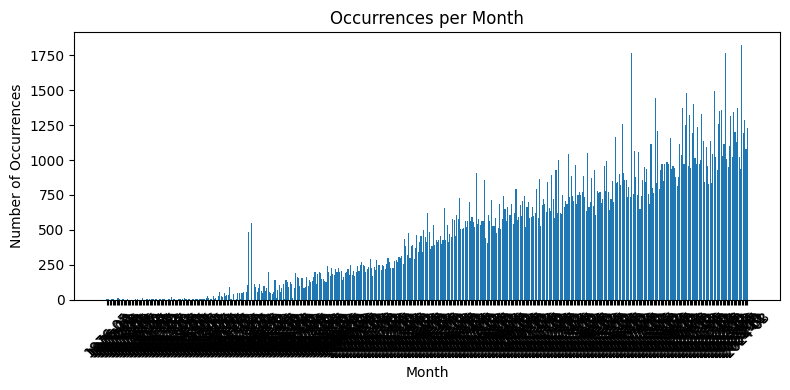

In [15]:
months = [date.strftime('%Y-%m') for date in dates]

# Count occurrences per month
month_counts = Counter(months)

# Sort by month
sorted_months = sorted(month_counts.keys())
counts = [month_counts[month] for month in sorted_months]

# Plot histogram (bar chart)
plt.figure(figsize=(8, 4))
plt.bar(sorted_months, counts)
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
cutoff1 = datetime(2021, 9, 30)
cutoff2 = datetime(2023, 6, 1)
cutoff3 = datetime(2024, 1, 1)

# Count occurrences in each range
count_before_cutoff1 = sum(d < cutoff1 for d in dates)
count_cutoff1_to_cutoff2 = sum(cutoff1 <= d < cutoff2 for d in dates)
count_cutoff2_to_cutoff3 = sum(cutoff2 <= d < cutoff3 for d in dates)
count_after_cutoff3 = sum(d >= cutoff3 for d in dates)

# Print results
print(f"Before 2021-09-30: {count_before_cutoff1}")
print(f"From 2021-09-30 to 2023-06-01: {count_cutoff1_to_cutoff2}")
print(f"From 2023-06-01 to 2024-01-01: {count_cutoff2_to_cutoff3}")
print(f"After 2024-01-01: {count_after_cutoff3}")

Before 2021-09-30: 181755
From 2021-09-30 to 2023-06-01: 22851
From 2023-06-01 to 2024-01-01: 8671
After 2024-01-01: 3593


In [2]:
import os
import json
import datetime
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors, Lipinski
from rdkit.Chem import DataStructs
from Bio.PDB import PDBParser

import matplotlib.pyplot as plt
import datetime
from tqdm.notebook import tqdm

In [8]:
MIN_SEQ_ID = 0.4
DATE_START = datetime.date(2023, 6, 1)
DATE_END = datetime.date(2024, 1, 1)
MAX_RESOLUTION = 4.5
MAX_RESIDUES = 1024
MAX_ENTITIES = 20
VALIDATION_OUTPUT = "filtered_validation_set.json"

with open('/scratch/shjiang/DATA/boltz_1/rcsb_processed_targets/manifest.json', 'r') as f:
    manifest = json.load(f)

In [9]:
def get_chain_clusters(cluster_mapping_file):
    """
    Parses MMseqs2 cluster mapping file and returns a dict: chain_id -> cluster_id
    """
    cluster_map = {}
    with open(cluster_mapping_file) as f:
        for line in f:
            cluster_id, *chains = line.strip().split()
            for chain in chains:
                cluster_map[chain] = cluster_id
    return cluster_map

In [10]:
cluster_map = get_chain_clusters("new_clustering/cluster_prot_cluster.tsv")  # chain_id → cluster_id

In [11]:
training = []
exceed_length = []
not_training = []
for record in tqdm(manifest):
    resolution = record['structure']['resolution']
    release_date = datetime.datetime.strptime(record['structure']['released'], '%Y-%m-%d').date()
    
    if release_date < DATE_START:
        chains = record['chains']
        num_residues = sum([i['num_residues'] for i in record['chains']])
        if num_residues < 5000:
            training.append(record)
        else:
            exceed_length.append(record)
            not_training.append(record)
    else:
        not_training.append(record)

  0%|          | 0/216870 [00:00<?, ?it/s]

In [12]:
training_pdb_ids = set([i['id'] for i in training])

In [13]:
len(training),len(training_pdb_ids),len(manifest),len(exceed_length)

(197996, 197996, 216870, 6610)

In [14]:
validation_all = []
validation_filter_1 = []
validation_filter_2 = []
for record in tqdm(not_training):
    resolution = record['structure']['resolution']
    release_date = datetime.datetime.strptime(record['structure']['released'], '%Y-%m-%d').date()
    
    if release_date > DATE_START and release_date <= DATE_END:
        validation_all.append(record)
        if resolution < 4.5:
            validation_filter_1.append(record)
            pdb_id = record['id']
            chains = record['chains']
            if any(cluster_map.get(f"{pdb_id}_{chain['chain_name'][0]}", '').split('_')[0] in training_pdb_ids for chain in chains):
                continue
            else:
                validation_filter_2.append(record)
print(len(validation_all), len(validation_filter_1),len(validation_filter_2))

  0%|          | 0/18874 [00:00<?, ?it/s]

8671 8671 3039


In [15]:
validation_filter_3 = []
for i in validation_filter_2:
    pdb_id = i['id']
    if os.path.exists(f'/scratch/shjiang/DATA/boltz_2/rcsb_processed_targets/{pdb_id}.pkl'):
        validation_filter_3.append(i)
len(validation_filter_3)

3026

In [46]:
def satisfies_lipinski_rule(mol) -> bool:
#     mol = Chem.MolFromSmiles(ligand['smiles'])
    if mol is None:
        return False
    try:
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        h_donors = Lipinski.NumHDonors(mol)
        h_acceptors = Lipinski.NumHAcceptors(mol)
        return (
            mw <= 500 and
            logp <= 5 and
            h_donors <= 5 and
            h_acceptors <= 10
        )
    except:
        return False
with open('/scratch/shjiang/DATA/boltz_1/ccd/ccd.pkl', 'rb') as file:
    ccd = pickle.load(file)

In [18]:
from Bio.PDB.MMCIF2Dict import MMCIF2Dict
from boltz.data.const import ligand_exclusion
valid_ccd = {k:v for k,v in ccd.items() if k not in ligand_exclusion}

In [19]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import itertools
import pandas as pd

In [20]:
len(valid_ccd),len(ccd)


(47126, 47256)

In [36]:
from rdkit import RDLogger                                                                                                                                                               
RDLogger.DisableLog('rdApp.*') 

In [48]:
validation_filter_4 = []
mols_for_sim = {}
for i in tqdm(validation_filter_3):
    pdb_id = i['id']
    cif_file = f'/scratch/shjiang/DATA/boltz_1/PDB/{pdb_id}.cif'
    cif = MMCIF2Dict(cif_file)
    try:
        non_poly = cif['_pdbx_entity_nonpoly.comp_id']
#         if not non_poly:
#             validation_filter_4.append(i)
#         else:
        mols = {i:ccd.get(i, None) for i in non_poly if i not in ligand_exclusion}
        mols = {k:v for k,v in mols.items() if v and v.GetNumHeavyAtoms() > 1}
        if not mols:
            # all mols has heavy atoms < 1, no need for similarity search
            validation_filter_4.append(i)
            continue
        
        lipinski = [satisfies_lipinski_rule(mol) for k,mol in mols.items()]
        if any(lipinski):
            validation_filter_4.append(i)
            continue

        # store for futher usage
        mols_for_sim[pdb_id] = non_poly
    except KeyError:
        # does not contain non-poly -> does not contain molecule
        validation_filter_4.append(i)

  0%|          | 0/3026 [00:00<?, ?it/s]

In [49]:
len(validation_filter_4)

2319

In [53]:
mols_only_for_sim = set().union(*mols_for_sim.values())

In [63]:
from rdkit.Chem import rdFingerprintGenerator
from collections import defaultdict
def pairwise_tanimoto_similarity(target, mol_dict):
    # Generate Morgan fingerprints for each molecule
    mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)
    fps = {}
    for k, mol in mol_dict.items():
        try:
            f_ = mfpgen.GetFingerprint(mol) 
            fps[k] = f_
        except:
            pass
            
    print(f"len(fps): {len(fps)}")
    
    # Compute pairwise similarities
    results = defaultdict(list)
    print("starting....")
    for k1 in tqdm(target):
        for k2 in mol_dict:
            try:
                sim = DataStructs.TanimotoSimilarity(fps[k1], fps[k2])
            except:
                sim = 0
            if k1 not in results:
                results[k1] = []
            results[k1].append((k2, sim))
    
    # Convert to DataFrame
    return results

In [64]:
# assuming training contains all mols from ccd, since extracting the REAL mols are too time consuming
results = pairwise_tanimoto_similarity(mols_only_for_sim, valid_ccd)

len(fps): 46922
starting....


  0%|          | 0/334 [00:00<?, ?it/s]

In [68]:
validation_filter_4_sim = []
for pdb_id, list_mols in tqdm(mols_for_sim.items()):
    for mol in list_mols:
        sims = results[mol]
        sims = [i[1] < 0.85 for i in sims]
        if any(sims):
            validation_filter_4_sim.append(pdb_id)
            break

  0%|          | 0/707 [00:00<?, ?it/s]

In [71]:
len(validation_filter_4_sim), len(mols_for_sim)

(707, 707)

In [72]:
len(validation_filter_4_sim) + len(validation_filter_4), len(validation_filter_3)

(3026, 3026)